In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         245 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.5.0-py_0

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge

In [6]:
data1 = pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')

In [7]:
data4 = pd.read_csv('bank-additional/bank-additional.csv',sep=';')

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [172]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [173]:
data1.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [18]:
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
data1['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

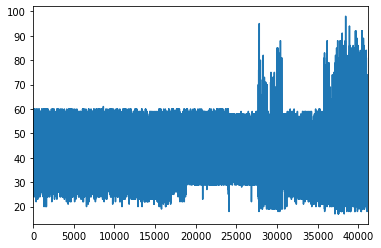

In [34]:
data1['age'].plot()

In [11]:
df1 = data1.copy()

In [13]:
df1.housing[df1.housing == 'no'] = 0
df1.housing[df1.housing == 'yes'] = 1
df1.housing[df1.housing == 'unknown'] = 2

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

In [14]:
df1.loan[df1.loan == 'no'] = 0
df1.loan[df1.loan == 'yes'] = 1
df1.loan[df1.loan == 'unknown'] = 2

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykern

In [7]:
df1[['housing','loan']]

,housing,loan
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
41183,1,0
41184,0,0
41185,1,0
41186,0,0


In [74]:
df1['housing'].count()

41188

In [16]:
df1.set_index(['housing','loan']).count(level='housing')

,age,job,marital,education,default,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,,,,,,,,,,
0,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622,18622
1,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576
2,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990,990


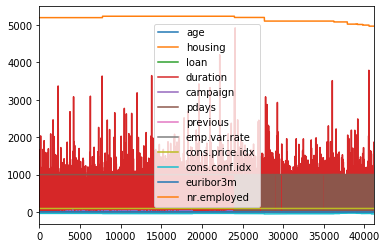

In [8]:
df1.plot()

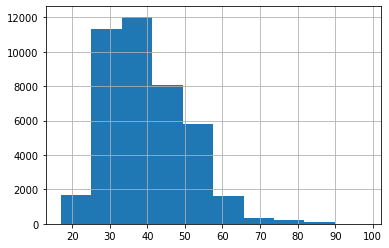

In [11]:
df1.age.hist()

In [15]:
df1['housing'].isnull().values.any()

False

In [15]:
df1 = df1.astype({'housing':'int64','loan':'int64'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c73d50>,
      dtype=object)

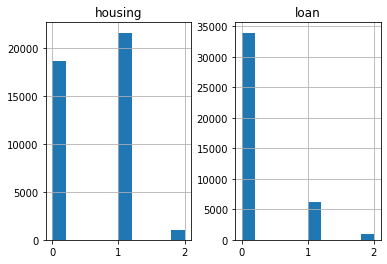

In [22]:
df1[['housing','loan']].hist()

In [30]:
new_df1.groupby(['y']).count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


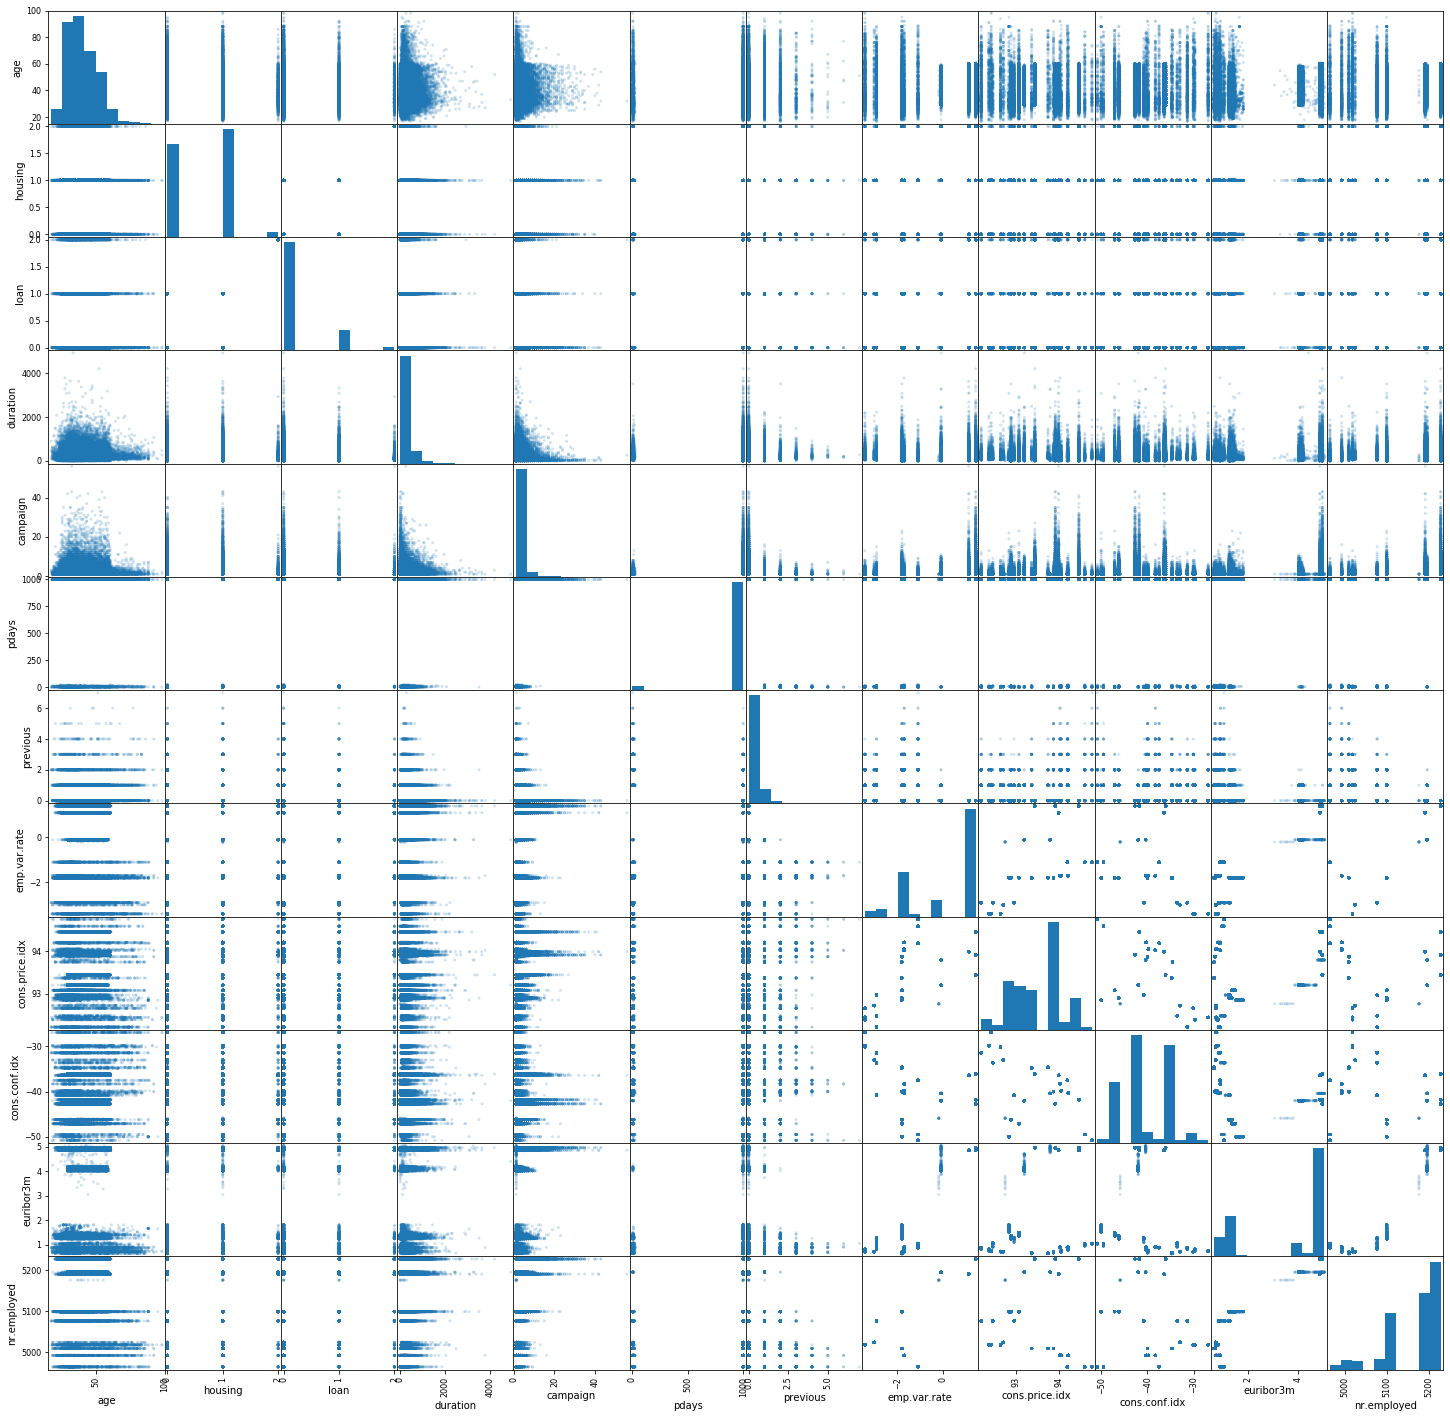

In [34]:
scatter_matrix(new_df1,alpha=0.2, figsize = (25,25));

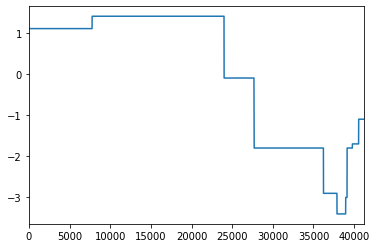

In [35]:
df1[['emp.var.rate']].plot()

In [36]:
df1['emp.var.rate'].unique() #employment variation rate

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [37]:
df1['cons.price.idx'].unique() #consumer price index - monthly indicator

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [38]:
df1['cons.conf.idx'].unique() #consumer confidence index - monthly indicator

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [43]:
len(df1['nr.employed'].unique()) #number of employees - quarterly indicator

11

In [45]:
(df1['euribor3m'].unique()) #euribor 3 month rate - daily indicator

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [55]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d687790>]],
      dtype=object)

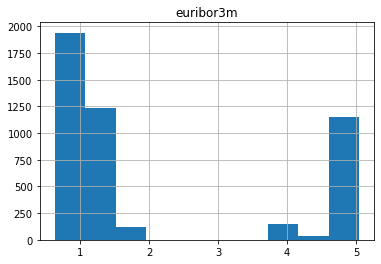

In [10]:
df1[['euribor3m','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12055a850>]],
      dtype=object)

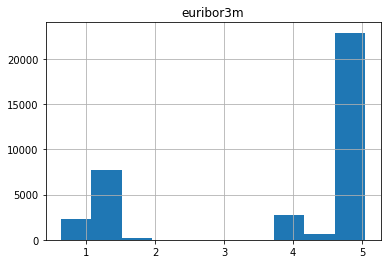

In [15]:
df1[['euribor3m','y']][df1['y']=='no'].hist() # rate started dropping from 5% (2008)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e91b250>]],
      dtype=object)

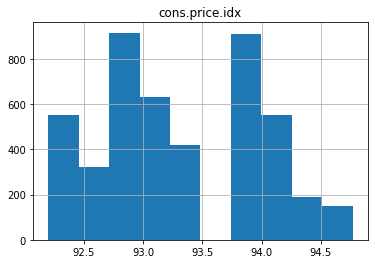

In [11]:
df1[['cons.price.idx','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120875890>]],
      dtype=object)

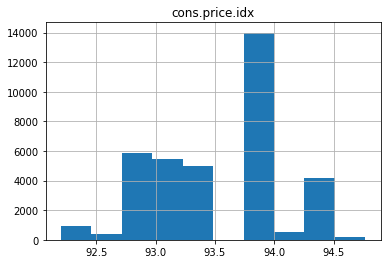

In [12]:
df1[['cons.price.idx','y']][df1['y']=='no'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1202d7490>]],
      dtype=object)

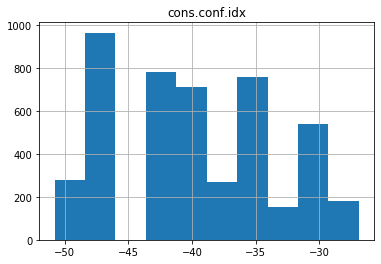

In [13]:
df1[['cons.conf.idx','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1203a1f10>]],
      dtype=object)

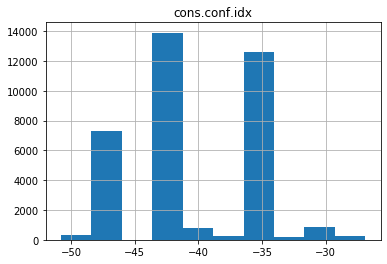

In [14]:
df1[['cons.conf.idx','y']][df1['y']=='no'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120154dd0>,
      dtype=object)

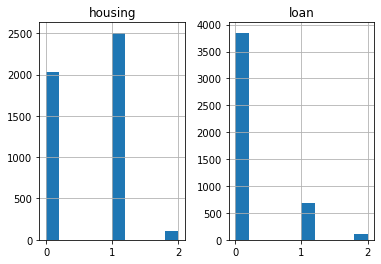

In [23]:
df1[['housing','loan','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120424fd0>,
      dtype=object)

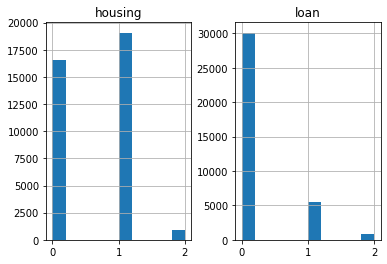

In [24]:
df1[['housing','loan','y']][df1['y']=='no'].hist()

### one hot encorder

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [249]:
enc = OneHotEncoder(handle_unknown = 'ignore')

In [260]:
c = df1.housing.toarray()

enc.fit(c)

AttributeError: 'Series' object has no attribute 'toarray'

In [262]:
data1.housing

0         no
1         no
2        yes
3         no
4         no
        ... 
41183    yes
41184     no
41185    yes
41186     no
41187    yes
Name: housing, Length: 41188, dtype: object

### LogisticRegression

In [379]:
new_df1 = df1.copy()

In [380]:
new_df1.y[new_df1.y == 'yes'] = 1
new_df1.y[new_df1.y == 'no'] = 0
new_df1 = new_df1.astype({'y':'int64'})

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(8), object(8)
memory usage: 

In [19]:
X = new_df1[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']]
y = new_df1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression(class_weight='balanced',random_state = 0)
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [115]:
y_train[y_train == 1]

21035    1
40604    1
36816    1
37042    1
41049    1
        ..
15346    1
40042    1
38961    1
17074    1
34389    1
Name: y, Length: 3519, dtype: int64

In [101]:
from sklearn.metrics import log_loss
train_pred_probs = model.predict_proba(X)
log_loss(y, train_pred_probs, normalize=False)


12174.49371903012

In [103]:
print(model.coef_)

[[ 0.00091776 -0.13870224  0.41421569  0.04327017 -0.1959103  -0.00747294
  -0.05123705]]


In [20]:
model.score(X_test,y_test)

0.716130911916092

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
(model.predict(X_test) == y_test).mean()

0.716130911916092

In [23]:
pd.crosstab(y_test, model.predict(X_test), rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,6564,2579
1,344,810


In [24]:
accuracy_score(y_test, model.predict(X_test))

0.716130911916092

In [89]:
new_df1.previous

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    1
Name: previous, Length: 41188, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a267f68d0>]],
      dtype=object)

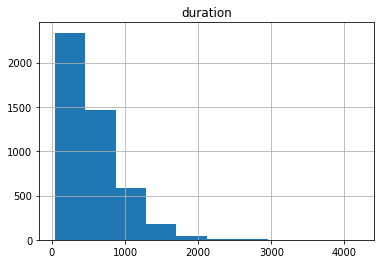

In [93]:
df1[['duration','y']][df1['y']=='yes'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26b2a650>]],
      dtype=object)

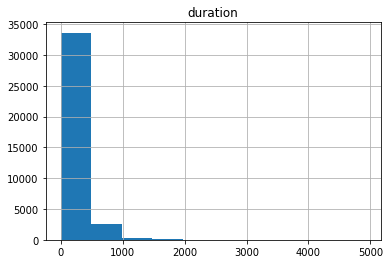

In [97]:
df1[['duration','y']][df1['y']=='no'].hist()

In [153]:
X = new_df1[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign']]
y = new_df1['y']

In [286]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [261]:
?ClusterCentroids

In [287]:
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [290]:
print(sorted(Counter(y_resampled).items()))

[(0, 3486), (1, 3486)]


step1: do train test split
step2: keep the test for final test
step3: balance the data by undersampleing the majority class.
step4: train test split over the balance data
step5: check the performance for find the best model.
step6: find the performance with the test data in step2.

In [270]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled)

In [79]:
model1 = LogisticRegression(random_state = 0)
model1.fit(X_train1, y_train1)
probabilities = model1.predict_proba(X_test1)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
probabilities


array([[2.63845375e-01, 7.36154625e-01],
       [2.51060460e-01, 7.48939540e-01],
       [5.67838560e-01, 4.32161440e-01],
       ...,
       [6.01519046e-01, 3.98480954e-01],
       [2.60548926e-01, 7.39451074e-01],
       [9.99980060e-01, 1.99400390e-05]])

In [33]:
model1.score(X_test1,y_test1) # undersampling

0.714859437751004

In [35]:
pd.crosstab(y_test1, model1.predict(X_test1), rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,508,356
1,141,738


In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res, y_res)

In [117]:
model2 = LogisticRegression(C = 100, max_iter= 100,random_state=0)
model2.fit(X_train2, y_train2)
probabilities = model2.predict_proba(X_test2)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
model2.score(X_test2,y_test2) #oversampling

0.7137853024885061

In [119]:
pd.crosstab(y_test2, model2.predict(X_test2), rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,4917,1899
1,2023,4864


Precision = PPV $= \frac{TP}{TP+FP}$

Sensitivity = Recall = TPR $= \frac{TP}{TP+FN}$


### GridSearch

In [106]:
from sklearn.model_selection import GridSearchCV

In [110]:
model3 = LogisticRegression(solver = 'lbfgs')

In [113]:
param_grid = [
  {'C': [1, 10, 100],'max_iter':[10,100]}]
search = GridSearchCV(model3,param_grid,cv=10)
search.fit(X_train2,y_train2)
print(search.best_params_)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


{'C': 100, 'max_iter': 100}


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [104]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [105]:
from sklearn import metrics
y = 
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

SyntaxError: invalid syntax (<ipython-input-105-d0e18c748fc6>, line 2)

### decision tree

In [220]:
from sklearn.tree import DecisionTreeClassifier

### random forests

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [90]:
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0,
                           
                        )
rf.fit(X_train1, y_train1)
                                     
# Test Prediction
pred = rf.predict(X_test1)
print(f"accuracy = {rf.score(X_test1, y_test1)}")
print(f"r2 = {r2_score(y_test1, pred)}")

accuracy = 0.7584624211130235
r2 = 0.033778125395019454


In [91]:
pd.crosstab(y_test1, rf.predict(X_test1), rownames=['actual'], colnames=['predicted'])


predicted,0,1
actual,,
0,625,239
1,182,697


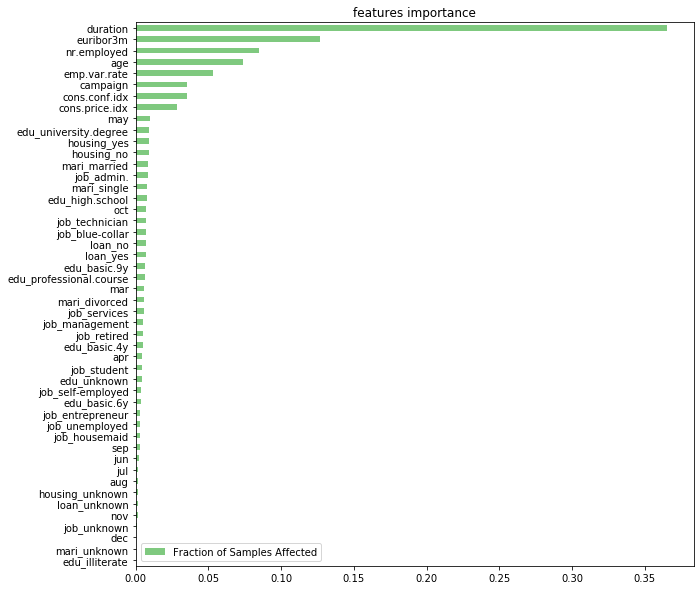

In [521]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', title = 'features importance',colormap = 'Accent',figsize=(10,10))

### Gradient Boosting

In [512]:
rf.feature_importances_

array([7.40672298e-02, 5.34213048e-02, 2.87193105e-02, 3.52925979e-02,
       1.27024311e-01, 8.48508737e-02, 3.55700034e-02, 4.62993924e-03,
       1.75931057e-03, 5.96898243e-04, 1.82809410e-03, 2.10667372e-03,
       5.87346267e-03, 1.01389658e-02, 1.58854552e-03, 7.44010692e-03,
       2.80002788e-03, 7.10940210e-03, 1.67525817e-03, 6.83932616e-03,
       9.09327138e-03, 1.69174723e-03, 9.17858836e-03, 3.65198725e-01,
       8.38849345e-03, 7.24993474e-03, 3.26331294e-03, 2.91220074e-03,
       4.96594806e-03, 4.94982916e-03, 3.66084796e-03, 5.44879770e-03,
       4.38760369e-03, 7.32328915e-03, 3.17242711e-03, 1.15959114e-03,
       4.85358599e-03, 3.39631996e-03, 6.28682573e-03, 7.99592803e-03,
       9.90805005e-05, 6.24625503e-03, 9.24151462e-03, 4.12872262e-03,
       5.63070674e-03, 8.39630465e-03, 8.00358571e-03, 3.44920158e-04])

In [50]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier)

In [187]:
gnmodel1 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 2000, max_depth=4, random_state=0, min_samples_split=3, max_features= 'auto')

In [273]:
gnmodel1.fit(X_resample,y_resample)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [283]:

gnmodel2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 2000,random_state=0, max_features= 'auto')



In [284]:
gnmodel2.fit(X_res,y_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [288]:
gnmodel1.score(X_test,y_test)

0.3143634068175197

In [ ]:
y_test1

In [289]:
gnmodel2.score(X_test,y_test)

0.8211129455181121

In [275]:
l1 = pd.crosstab(y_test, gnmodel1.predict(X_test), rownames=['actual'], colnames=['predicted'])
l1

predicted,0,1
actual,,
0,2414,6729
1,331,823


In [276]:
print("precision:{precision}, recall:{recall}".format(precision = l1[0][0]/(l1[0][0]+l1[0][1]),recall = l1[0][0]/(l1[0][0]+l1[1][0])))

precision:0.8794171220400728, recall:0.2640271245761785


In [291]:
l2 = pd.crosstab(y_test, gnmodel2.predict(X_test), rownames=['actual'], colnames=['predicted'])
l2

predicted,0,1
actual,,
0,7750,1393
1,449,705


In [292]:
print("precision:{precision}, recall:{recall}".format(precision = l2[0][0]/(l2[0][0]+l2[0][1]),recall = l2[0][0]/(l2[0][0]+l2[1][0])))

precision:0.9452372240517136, recall:0.8476430055780378


In [193]:
search_gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 2000, random_state=0, max_features= 'auto')



In [194]:
param_grid = [
  {'min_samples_split':[3,4,5,6,7],'max_depth':[4,5,6,7,8]}]
search = GridSearchCV(search_gb,param_grid,cv=5)
search.fit(X_train2,y_train2)
print(search.best_params_)

KeyboardInterrupt: 

In [ ]:
search_gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 2000, random_state=0, max_features= 'auto')
param_grid = [
  {'min_samples_split':[3,4,5,6,7],'max_depth':[4,5,6,7,8]}]
search = GridSearchCV(search_gb,param_grid,cv=5)
search.fit(X_train2,y_train2)
print(search.best_params_)

### XGBOOST

In [202]:
import xgboost as xgb
from xgboost import XGBClassifier

In [4]:
conda install py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /usr/local/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    libxgboost-0.90            |       h0a44026_1         1.2 MB
    py-xgboost-0.90            |   py37h0a44026_1          75 KB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-0.90-h0a44026_1
  py-xgboost         pkgs/main/osx-64::py-xgboost-0.90-py37h0a44026_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> pkgs/

In [228]:
xgmodel = XGBClassifier(learning_rate = 0.1, n_estimators = 2000, random_state=0,max_depth=8)
xgmodel.fit(X_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [258]:
xgmodel.score(X_test2,y_test2)

0.8490841421586514

In [295]:
xg = pd.crosstab(y_test2, xgmodel.predict(X_test2), rownames=['actual'], colnames=['predicted'])
xg

predicted,0,1
actual,,
0,5634,1182
1,886,6001


In [231]:
print("precision:{precision}, recall:{recall}".format(precision = xg[0][0]/(xg[0][0]+xg[0][1]),recall = xg[0][0]/(xg[0][0]+xg[1][0])))

precision:0.8641104294478528, recall:0.8265845070422535


In [ ]:
search_xg = XGBClassifier(learning_rate = 0.1, n_estimators = 2000, random_state=0)


### roc curve

In [43]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

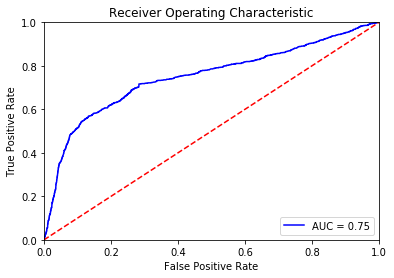

In [44]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
probs = model1.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test1, preds)
roc_auc = metrics.auc(fpr, tpr)

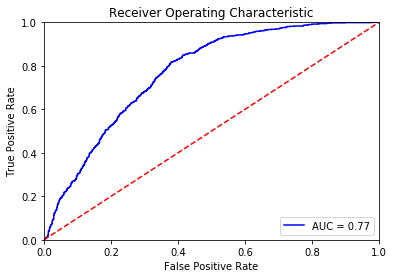

In [46]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
probs = model2.predict_proba(X_test2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test2, preds)
roc_auc = metrics.auc(fpr, tpr)

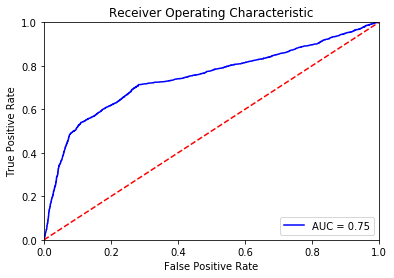

In [48]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [271]:
probs = gnmodel1.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

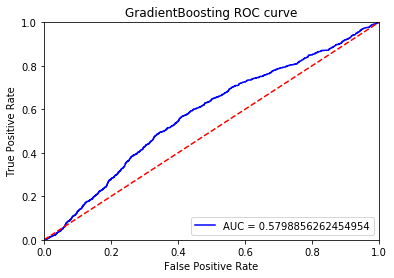

In [272]:
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### gradientboosting with undersampling data ROC curve
#### precision = 0.8257
#### recall = 0.7569

In [293]:
probs = gnmodel2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

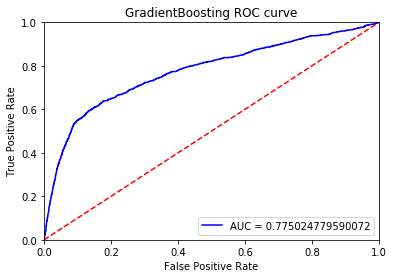

In [294]:
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### gradientboosting with oversampling data ROC curve
#### precision = 0.7596
#### recall = 0.866

In [66]:
len(probs[:,1])

1743

In [70]:
probs.shape

(1743, 2)

In [375]:
housing_ = pd.get_dummies(data1.housing,prefix='housing')

In [376]:
loan_ = pd.get_dummies(data1.loan,prefix='loan')

In [385]:
job_ = pd.get_dummies(data1.job,prefix='job')
job_

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,0,1,0,0


In [387]:
edu_ = pd.get_dummies(data1.education,prefix='edu')
edu_

,edu_basic.4y,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0
41184,0,0,0,0,0,1,0,0
41185,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,1,0,0


In [393]:
mari_ = pd.get_dummies(data1.marital,prefix='mari')
mari_

,mari_divorced,mari_married,mari_single,mari_unknown
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
41183,0,1,0,0
41184,0,1,0,0
41185,0,1,0,0
41186,0,1,0,0


In [381]:
month_ = pd.get_dummies(data1.month)
new_df1 = pd.concat([new_df1,month_],axis=1)
new_df1 = pd.concat([new_df1,loan_,housing_],axis=1)

In [386]:
new_df1 = pd.concat([new_df1,job_],axis=1)

In [388]:
new_df1 = pd.concat([new_df1,edu_],axis=1)

In [394]:
new_df1 = pd.concat([new_df1,mari_],axis=1)

In [395]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
age                        41188 non-null int64
job                        41188 non-null object
marital                    41188 non-null object
education                  41188 non-null object
default                    41188 non-null object
housing                    41188 non-null int64
loan                       41188 non-null int64
contact                    41188 non-null object
month                      41188 non-null object
day_of_week                41188 non-null object
duration                   41188 non-null int64
campaign                   41188 non-null int64
pdays                      41188 non-null int64
previous                   41188 non-null int64
poutcome                   41188 non-null object
emp.var.rate               41188 non-null float64
cons.price.idx             41188 non-null float64
cons.conf.idx              41188 non-null float64
euribor3m    

### precision score

In [82]:
y_score = gnmodel.decision_function(X_test1)

In [84]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test1,y_score)

In [86]:
print(average_precision)

0.8651296506672072


In [397]:
X = new_df1[['age','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','campaign',
            'apr','aug','dec','jul','jun','mar','may','nov','oct','sep','loan_no','loan_unknown','loan_yes',
            'housing_no','housing_unknown','housing_yes','duration','job_admin.','job_blue-collar','job_entrepreneur'
            ,'job_housemaid','job_management','job_retired','job_self-employed','job_services','job_student','job_technician',
            'job_unemployed','job_unknown','edu_basic.4y','edu_basic.6y','edu_basic.9y','edu_high.school','edu_illiterate',
            'edu_professional.course','edu_university.degree','edu_unknown','mari_divorced','mari_married','mari_single',
            'mari_unknown']]
y = new_df1['y']

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [365]:
data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Grandient Boosting

In [405]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [406]:
print(sorted(Counter(y_res).items()))

[(0, 27440), (1, 27440)]


In [358]:
gdbmodel = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 4000,random_state=0, max_features= 'auto',max_depth= 8)


In [407]:
gdbmodel.fit(X_res,y_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=4000,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [479]:
result = pd.crosstab(y_test, gdbmodel.predict(X_test), rownames=['actual'], colnames=['predicted'])
result

predicted,0,1
actual,,
0,8624,484
1,469,720


In [409]:
print("precision:{precision}, recall:{recall}".format(precision = result[1][1]/(result[1][1]+result[1][0]),recall = result[1][1]/(result[1][1]+result[0][1])))

precision:0.5980066445182725, recall:0.6055508830950378


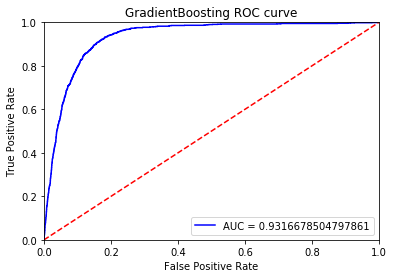

In [414]:
probs = gdbmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [415]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0,sampling_strategy= {0:7000})
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)


In [337]:
ClusterCentroids?

In [422]:
print(sorted(Counter(y_resampled).items())) 

[(0, 7000), (1, 3451)]


In [416]:
gdbmodel1 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 2000,random_state=0, max_features= 'auto')


In [417]:
gdbmodel1.fit(X_resampled,y_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=2000,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [418]:
result1 = pd.crosstab(y_test, gdbmodel1.predict(X_test), rownames=['actual'], colnames=['predicted'])
result1

predicted,0,1
actual,,
0,4665,4443
1,190,999


In [436]:
print("precision:{precision}, recall:{recall}".format(precision = result1[1][1]/(result1[1][1]+result1[1][0]),recall = result1[0][0]/(result1[0][0]+result1[1][0])))

precision:0.18357221609702315, recall:0.5121870882740448


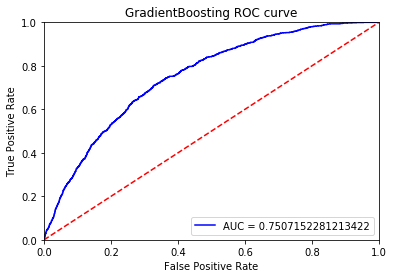

In [421]:
probs = gdbmodel1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## random forest

In [455]:
rf = RandomForestClassifier(n_estimators=1000,
                           max_features='auto',
                           random_state=0,
                            class_weight = {0:0.2,1:0.8}, min_samples_split = 3
                           
                        )
rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)
print(f"accuracy = {rf.score(X_test, y_test)}")
print(f"r2 = {r2_score(y_test, pred)}")

accuracy = 0.9121103233951636
r2 = 0.1394929844759809


In [474]:
rf_ = pd.crosstab(y_test, rf.predict(X_test), rownames=['actual'], colnames=['predicted'])
rf_

predicted,0,1
actual,,
0,8761,347
1,558,631


In [489]:
cost_benefit = pd.DataFrame([[0,-5],[-15,15]])
cost_benefit.index.name = 'actual'
cost_benefit.columns.name = 'predicted'

In [503]:
rf_result = rf_ * cost_benefit
rf_result
print((rf_result[1][1] + rf_result[1][0] + rf_result[0][1]))


-640


In [504]:
gdb_result = result * cost_benefit
gdb_result
print((gdb_result[1][1] + gdb_result[1][0] + gdb_result[0][1]))

1345


In [505]:
log_result = log1*cost_benefit
log_result
print((log_result[1][1] + log_result[1][0] + log_result[0][1]))

2395


In [506]:
cost_benefit

predicted,0,1
actual,,
0,0,-5
1,-15,15


In [457]:
print("precision:{precision}, recall:{recall}".format(precision = rf_[1][1]/(rf_[1][1]+rf_[1][0]),recall = rf_[1][1]/(rf_[1][1]+rf_[0][1])))

precision:0.6451942740286298, recall:0.5306980656013457


In [462]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
probs1 = gdbmodel.predict_proba(X_test)
preds1 = probs1[:,1]
probs2 = log_.predict_proba(X_test)
preds2 = probs2[:,1]
probs3 = xgmodel.predict_proba(X_test)
preds3 = probs3[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
roc_auc = metrics.auc(fpr, tpr)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)


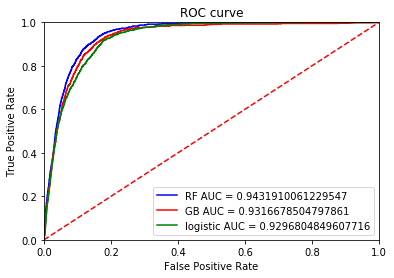

In [469]:
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = "RF AUC = {}".format(roc_auc))
plt.plot(fpr1, tpr1, 'r', label = "GB AUC = {}".format(roc_auc1))
plt.plot(fpr2, tpr2, 'g', label = "logistic AUC = {}".format(roc_auc2))
# plt.plot(fpr3, tpr3, 'k', label = "xgboost AUC = {}".format(roc_auc3))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## logistic regression

In [574]:
log_ = LogisticRegression(class_weight={0:0.5,1:1},random_state = 0,solver='liblinear',max_iter = 1000)
log_.fit(X_train, y_train)
log_.predict(X_test)
log_.score(X_test,y_test)
log_.predict_proba(X_test)

array([[0.9792072 , 0.0207928 ],
       [0.37092347, 0.62907653],
       [0.98641446, 0.01358554],
       ...,
       [0.59279538, 0.40720462],
       [0.79466441, 0.20533559],
       [0.99047316, 0.00952684]])

In [570]:
log1 = pd.crosstab(y_test, log_.predict(X_test), rownames=['actual'], colnames=['predicted'])
log1

predicted,0,1
actual,,
0,8609,499
1,480,709


In [571]:
print("precision:{precision}, recall:{recall}".format(precision = log1[1][1]/(log1[1][1]+log1[1][0]),recall = log1[1][1]/(log1[1][1]+log1[0][1])))

precision:0.5869205298013245, recall:0.5962994112699748


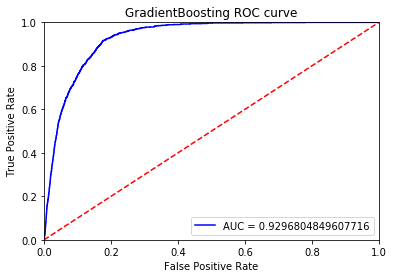

In [432]:
probs = log_.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [467]:
xgmodel = XGBClassifier(learning_rate = 0.1, n_estimators = 2000, random_state=0,max_depth=8)
xgmodel.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [468]:
xgmodel.score(X_test,y_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47'] ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'loan_no', 'loan_unknown', 'loan_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'duration', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'edu_basic.4y', 'edu_basic.6y', 'edu_basic.9y', 'edu_high.school', 'edu_illiterate', 'edu_professional.course', 'edu_university.degree', 'edu_unknown', 'mari_divorced', 'mari_married', 'mari_single', 'mari_unknown']
expected f5, f20, f4, f0, f27, f10, f28, f19, f39, f45, f47, f21, f37, f46, f40, f7, f3, f44, f23, f35, f2, f18, f38, f34, f1, f29, f36, f26, f17, f12, f24, f30, f41, f13, f11, f6, f25, f22, f43, f31, f32, f42, f16, f9, f14, f8, f15, f33 in input data
training data did not have the following fields: job_self-employed, housing_yes, edu_basic.9y, jul, job_unemployed, oct, jun, job_blue-collar, edu_university.degree, emp.var.rate, loan_unknown, mari_divorced, housing_unknown, edu_basic.4y, job_retired, job_unknown, mar, aug, edu_high.school, nr.employed, sep, loan_yes, housing_no, job_admin., edu_unknown, loan_no, job_management, job_student, apr, edu_illiterate, job_services, mari_married, mari_unknown, campaign, may, job_housemaid, edu_professional.course, edu_basic.6y, duration, job_technician, cons.price.idx, dec, cons.conf.idx, euribor3m, nov, job_entrepreneur, age, mari_single

In [484]:
xg = pd.crosstab(y_test, xgmodel.predict(X_test), rownames=['actual'], colnames=['predicted'])
xg

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47'] ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'loan_no', 'loan_unknown', 'loan_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'duration', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'edu_basic.4y', 'edu_basic.6y', 'edu_basic.9y', 'edu_high.school', 'edu_illiterate', 'edu_professional.course', 'edu_university.degree', 'edu_unknown', 'mari_divorced', 'mari_married', 'mari_single', 'mari_unknown']
expected f5, f20, f4, f0, f27, f10, f28, f19, f39, f45, f47, f21, f37, f46, f40, f7, f3, f44, f23, f35, f2, f18, f38, f34, f1, f29, f36, f26, f17, f12, f24, f30, f41, f13, f11, f6, f25, f22, f43, f31, f32, f42, f16, f9, f14, f8, f15, f33 in input data
training data did not have the following fields: job_self-employed, housing_yes, edu_basic.9y, jul, job_unemployed, oct, jun, job_blue-collar, edu_university.degree, emp.var.rate, loan_unknown, mari_divorced, housing_unknown, edu_basic.4y, job_retired, job_unknown, mar, aug, edu_high.school, nr.employed, sep, loan_yes, housing_no, job_admin., edu_unknown, loan_no, job_management, job_student, apr, edu_illiterate, job_services, mari_married, mari_unknown, campaign, may, job_housemaid, edu_professional.course, edu_basic.6y, duration, job_technician, cons.price.idx, dec, cons.conf.idx, euribor3m, nov, job_entrepreneur, age, mari_single

In [445]:
print("precision:{precision}, recall:{recall}".format(precision = xg[1][1]/(xg[1][1]+xg[1][0]),recall = xg[1][1]/(xg[1][1]+xg[0][1])))

precision:0.6127497621313035, recall:0.5416316232127838


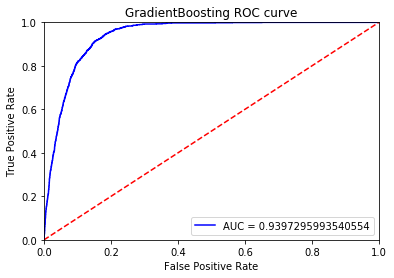

In [440]:
probs = xgmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('GradientBoosting ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC = {}".format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [486]:
X_train.head()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,apr,aug,dec,...,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown,mari_divorced,mari_married,mari_single,mari_unknown
29469,26,-1.8,93.075,-47.1,1.405,5099.1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
32008,34,-1.8,92.893,-46.2,1.327,5099.1,3,0,0,0,...,0,1,0,0,0,0,0,0,1,0
22667,31,1.4,93.444,-36.1,4.964,5228.1,4,0,1,0,...,0,0,0,1,0,0,0,1,0,0
7577,56,1.1,93.994,-36.4,4.864,5191.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
918,40,1.1,93.994,-36.4,4.856,5191.0,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [524]:
search_log = LogisticRegression(class_weight={0:0.3,1:0.7},random_state = 0)
param_grid = [
  {'solver':['sag','saga','liblinear']}]
search = GridSearchCV(search_log,param_grid,cv=5,scoring='recall')
search.fit(X_train,y_train)
print(search.best_params_)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached w

{'solver': 'liblinear'}


In [581]:
def predict(model, X, threshold=0.5):
    '''Return prediction of the fitted binary-classifier model model on X using
    the specifed `threshold`. NB: class 0 is the positive class'''
    return np.where(model.predict_proba(X)[:, 0] > threshold,
                    model.classes_[0],
                    model.classes_[1])

def confusion_matrix(model, X, threshold=0.5):
    cf = pd.crosstab(y_test, predict(model, X_test, threshold))
#     cf = cf.add(pd.DataFrame([[0,0],[0,0]], columns=['Fraud', 'Not'], index=['Fraud', 'Not']), fill_value=0)
    cf.index.name = 'actual'
    cf.columns.name = 'predicted'
    return cf

In [659]:
model = log_
X = X_test
cm = confusion_matrix(model, X, 0.8)
cm_result = cm * cost_benefit
cm_result

predicted,0,1
actual,,
0,0,-7055
1,-2235,15600


In [660]:
print((cm_result[1][1] + cm_result[1][0] + cm_result[0][1]))

6310


In [661]:
cm

predicted,0,1
actual,,
0,7697,1411
1,149,1040


In [631]:
model = gdbmodel
cm = confusion_matrix(model, X, 0.9)
cm_result = cm * cost_benefit
cm_result

predicted,0,1
actual,,
0,0,-3390
1,-5175,12660


In [632]:
print((cm_result[1][1] + cm_result[1][0] + cm_result[0][1]))

4095


In [633]:
cm

predicted,0,1
actual,,
0,8430,678
1,345,844


In [662]:
model = rf
cm = confusion_matrix(model, X, 0.9)
cm_result = cm * cost_benefit
cm_result

predicted,0,1
actual,,
0,0,-8310
1,-870,16965


In [653]:
cm

predicted,0,1
actual,,
0,7446,1662
1,58,1131


In [654]:
print((cm_result[1][1] + cm_result[1][0] + cm_result[0][1]))

7785


In [655]:
print("precision:{precision}, recall:{recall}".format(precision = cm[1][1]/(cm[1][1]+cm[1][0]),recall = cm[1][1]/(cm[1][1]+cm[0][1])))

precision:0.40494092373791624, recall:0.9512195121951219


In [663]:
def calculate_payout(cost_benefit, model, X, threshold):
    return (confusion_matrix(model, X, threshold) * cost_benefit).values.sum()

Text(0.5, 1.0, 'Profit Curve')

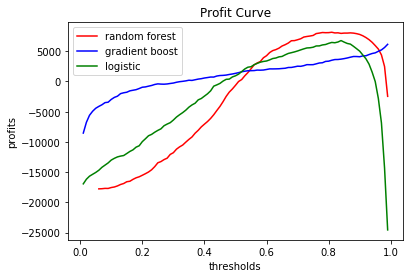

In [666]:
thresholds = np.arange(0.0, 1.0, 0.01)
profits = []
profits1 = []
profits2 = []
for threshold in thresholds:
    profits.append(calculate_payout(cost_benefit, rf, X, threshold))
for threshold in thresholds:
    profits1.append(calculate_payout(cost_benefit, gdbmodel, X, threshold))
for threshold in thresholds:
    profits2.append(calculate_payout(cost_benefit, log_, X, threshold))
fig, ax = plt.subplots()
ax.plot(thresholds, profits,label = 'random forest',color='r')
ax.plot(thresholds, profits1,label = 'gradient boost',color='b')
ax.plot(thresholds, profits2,label='logistic',color='g')
ax.legend()
ax.set_xlabel('thresholds')
ax.set_ylabel('profits')
ax.set_title('Profit Curve')

In [673]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df = df.reset_index(drop=True)
    return df

In [676]:
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)

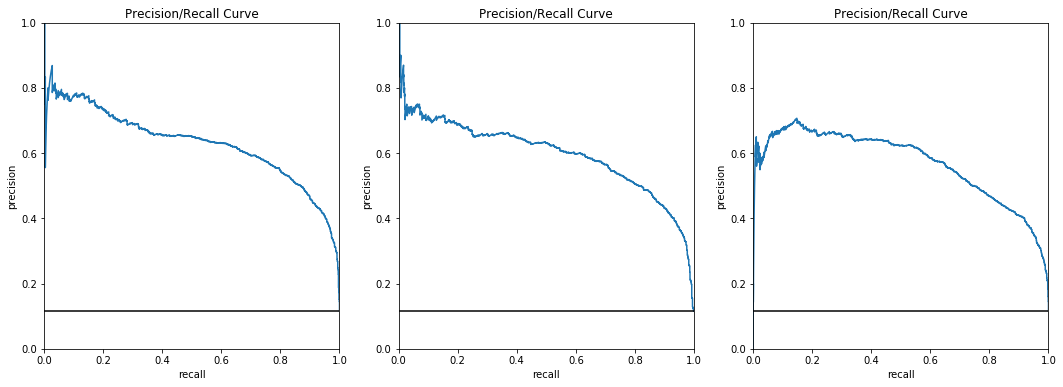

In [680]:
fig, (ax0, ax1, ax3) = plt.subplots(1,3, figsize=(18,6))
df = calculate_threshold_values(rf.predict_proba(X_test)[:,1], y_test)
df1 = calculate_threshold_values(gdbmodel.predict_proba(X_test)[:,1], y_test)
df2 = calculate_threshold_values(log_.predict_proba(X_test)[:,1], y_test)
plot_precision_recall(ax0, df)
plot_precision_recall(ax1, df1)
plot_precision_recall(ax3, df2)

In [679]:
rf.predict_proba(X_test)

array([[0.84701859, 0.15298141],
       [0.52576871, 0.47423129],
       [1.        , 0.        ],
       ...,
       [0.6456786 , 0.3543214 ],
       [0.89229364, 0.10770636],
       [0.99831111, 0.00168889]])